# Importing Libraries

This is useful to build the Model and to use the performance metrics for evaluation. These are all the necessary imports required for this Notebook

In [9]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
import itertools

from keras.utils import to_categorical

#Accuracy with the test data
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# To generate the classification report 
from sklearn.metrics import classification_report

# Extracting The Dataset

In [10]:
# import zipfile
# with zipfile.ZipFile('independent-evaluation.zip', 'r') as zip_ref:
#     zip_ref.extractall('./')

Loading the Model which has already been saved to perform the independent evaluation

In [11]:
model = tf.keras.models.load_model("signsClassifierModel.h5")

# DATA FORMATION

the images were converted into Gray Scale, such that the images would no longer be used on the RGB Channels, by using cv2.IMREAD_GRAYSCALE. The grey-scale images were then resized into a fixed size of 28x28 dimension, so that the models should be working smoothly on the same sized of the scaled images. Once the scaling and conversion of channels was performed the images were stored into an array by appending the images data with the categories. However, this was an essential step in order for me to segregate these images into two separate arrays, each for features and labels

In [12]:
CATEGORIES = ["bicycle", "continue", "crossing", "giveway", "laneend", "limitedtraffic", "noentry", "noparking", "parking", "rightofway", "roundabout", "speed", "stop", "trafficdirective", "traveldirection", "warning"]

EVALUATION_DATASET = "independent-evaluation/german-traffic-sign/signs"

dataArray = []

def CreateIndependentEvaluationArray():
  # Looping through the first loop to check each and every category  
  for category in CATEGORIES:
    path = os.path.join(EVALUATION_DATASET, category)
    classIndex = CATEGORIES.index(category)
    
    # Reading all the images from that category and storing the data in an image array
    for img in os.listdir(path):
      try:
        imagesArray = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        resizedImagesArray = cv2.resize(imagesArray, (28, 28))
        dataArray.append([resizedImagesArray, classIndex])
      except Exception as e:
        pass
    
CreateIndependentEvaluationArray()

# Appending features and label array from the data array
featuresArray = []
labelArray = []

for features, label in dataArray:
  featuresArray.append(features)
  labelArray.append(label)

# Once the looping through has been done, the images are reshaped and stored using numpy array       
featuresArray = np.array(featuresArray).reshape(-1, 28, 28, 1)
labelArray = np.array(labelArray)

uniqueLabelList = []

# To find out the list of unique number of labels present in the label array
def unique(list): 
    for x in list: 
        # check if exists in uniqueLabelList or not 
        if x not in uniqueLabelList: 
            uniqueLabelList.append(x) 
    
unique(labelArray)

print("Length (Number) of the Features Array:", len(featuresArray))
print("Number of Unique Labels:", len(uniqueLabelList))

Length (Number) of the Features Array: 124
Number of Unique Labels: 12


# Prediction

I had used different performance metrics for evaluation, such as Accuracy, Precision, Recall, and F1 Score. These metrics were used to determine the true positive, false positive, true negative and false negative values for the predictions when compared with the labelTestY. All these performance metrics showcased that the Models are performing highly accurate

In [13]:
predictions = model.predict_classes(featuresArray)

accuracy = accuracy_score(labelArray, predictions)

# precision tp / (tp + fp)
precision = precision_score(labelArray, predictions, average="weighted")

# recall: tp / (tp + fn)
recall = recall_score(labelArray, predictions, average="weighted")

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labelArray, predictions, average="weighted")


print("\nPrediction Test Accuracy: %f" % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)


Prediction Test Accuracy: 0.991935
Precision: 0.992440
Recall: 0.991935
F1 score: 0.991904


# Visualizing the Prediciton

This is to check that for the given unseen data, how many number of classes are predicied correctly and incorrectly


Found '123' Labels which are Predicted Correctly



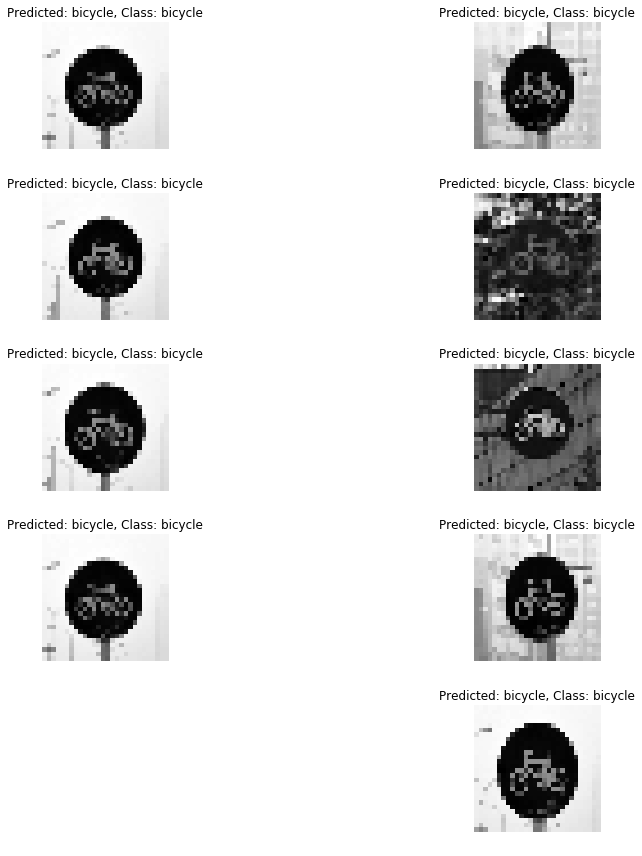

In [14]:
correct = np.where(predictions == labelArray)[0]
print("\nFound '%d' Labels which are Predicted Correctly\n" % len(correct))

plt.figure(figsize=(15,12))
for i, correct in enumerate(correct[:10]):
    plt.subplot(5, 2, i+1)
    plt.imshow(featuresArray[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Class: {}".format(CATEGORIES[predictions[correct]], CATEGORIES[labelArray[correct]]))
    plt.tight_layout()
    plt.axis('off')


Found '1' Labels which are Predicted Incorrectly



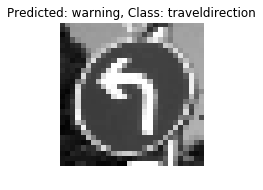

In [15]:
incorrect = np.where(predictions != labelArray)[0]
print("\nFound '%d' Labels which are Predicted Incorrectly\n" % len(incorrect))

plt.figure(figsize=(15,12))
for i, incorrect in enumerate(incorrect[:10]):
    plt.subplot(5, 2, i+1)
    plt.imshow(featuresArray[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Class: {}".format(CATEGORIES[predictions[incorrect]], CATEGORIES[labelArray[incorrect]]))
    plt.tight_layout()
    plt.axis('off')

Lastly, everything was summed up with a Confusion Matrix as to get a clear idea of which classes were incorrectly classified and what were the total count of those incorrectly predicted classes

In [16]:
cm = confusion_matrix(labelArray, predictions)

print ("Confusion Matrix:\n\n", cm)

Confusion Matrix:

 [[11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 12  1]
 [ 0  0  0  0  0  0  0  0  0  0  0 15]]
